## Test technique portant sur la classification de tweets
### Auteur: Richard LAMAH
### Etudiant de Master 2 Option Systèmes intelligents et Multimédia à l'Institut Francophone International (IFI), rattaché à l'Université Nationale du Vietnam, à Hanoï (UNVH), en Double diplômation avec l’Université de La Rochelle en France

## Introduction
#### Comme problématique il a été demandés d'utiliser un algorithme d'Apprentissage automatique (Machine learning)  a fin de prédire si un tweet parle effectivement d'une catastrophe naturelle ou non. Pour cella nous avons utilisé la régression logistique qui est l'un des algorithmes de Machine learning qui résoud ces cas de problématique.

## Plan du travail
#### I. Prétraitement des données
#### II. Nettoyage des données
#### III. Tokenisation
#### IV. Stemming
#### V. Visualisation de données
#### VI. Extraction des Features
#### VII. Construction de modèles
#### VIII. Ajouter une colonne "pred" avec les prédictions et enregistré en csv


## I. Prétraitement des données
### Comme toujours, avant d'arriver à la réalité, nous devons préparer nos données avant de pouvoir faire toute manipulation.Nous avons deux fichiers, un fichier train et un fichier test. Dans le fichier du train, nous avons un assortiment aléatoire de divers tweets. Il existe trois fonctionnalités, un identifiant unique, une étiquette et le texte du tweet. L'étiquette est «0» si le tweet ne parle pas catastrophe naturelle et l'étiquette est «1» si le tweet parle de catastrophe naturelle. Le fichier test n'a pas d'étiquètte.

### Avant tout nous allons importer des bibliothèques qu'on besoin pour commencer

In [1]:
#importation des libraries
import numpy as np             # numpy pour manipuler des matrices ou tableaux multidimensionnels
import pandas as pd            # pandas pour l'exploration de nos données
import matplotlib.pyplot as plt # matplotlib pour visualiser des données sous formes de graphiques
import seaborn as sns           # pour la visualisation de données Python basée sur matplotlib 
import nltk                     # nltk pour le nlp
import string                   
import warnings               #pour l'avertissement des différente erreur 
import re                     # pour des opérations de correspondance d'expressions régulières similaires.
warnings.filterwarnings('ignore', category=DeprecationWarning)

#### chargement des données

In [2]:
# Nous allons maintenant utiliser des pandas pour lire les fichiers de train et test 

train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
#Utilisons des pandas pour voir à quoi ressemblent nos données
train.head()

,sentence,label
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
test.head()

,sentence
0,Just happened a terrible car crash
1,"Heard about #earthquake is different cities, s..."
2,"there is a forest fire at spot pond, geese are..."
3,Apocalypse lighting. #Spokane #wildfires
4,Typhoon Soudelor kills 28 in China and Taiwan


#### Maintenant que nous avons chargé nos données, nous pouvons maximiser l'efficacité de notre apprentissage automatique en nettoyant nos données.

## II. Nettoyage des données

### Nous le faisons en trois partie: 
#### 1.Supprimer les poignées Twitter
#### 2.Supprimer la ponctuation,les chiffres et les caractères spéciaux;
#### 3.Supprimez les mots plus petits qui n'ajoutent pas beaucoup de valeur

#### Afin de gagner du temps, nous allons combiner nos trames de données de train et de test et faire tout le nettoyage des données sur les deux

In [6]:
#combinaison des données train et test
combi = train.append(test, ignore_index=True,sort=False)

In [7]:
#regardons à quoi ressemble 
combi.head()

,sentence,label
0,Our Deeds are the Reason of this #earthquake M...,1.0
1,Forest fire near La Ronge Sask. Canada,1.0
2,All residents asked to 'shelter in place' are ...,1.0
3,"13,000 people receive #wildfires evacuation or...",1.0
4,Just got sent this photo from Ruby #Alaska as ...,1.0


#### 1.Supprimer les poignées Twitter
#### Nous allons maintenant créer une expression régulière qui va nous permet de localiser et de supprimer les poignées Twitter de nos tweets.

In [8]:
#cette fonction permet de localiser et de supprimer les poignées Twitter de nos tweets
def remove_pattern(input_txt, pattern):
  r = re.findall(pattern, input_txt)
  for i in r:
    input_txt = re.sub(i, '', input_txt)

  return input_txt

# on applique la fonction sur nos données

combi['tidy_sentence'] = np.vectorize(remove_pattern)(combi['sentence'], "@[\w]*")



### 2.Supprimer la ponctuation,les chiffres et les caractères spéciaux;
#### Maintenant, notre trame de données  ne devrait plus avoir de poignées Twitter. Nous pouvons supprimer les caractères spéciaux, les chiffres et la ponctuation.

In [9]:
# Supprimer les caractères spéciaux, les chiffres, la ponctuation 

combi['tidy_sentence'] = combi['tidy_sentence'].str.replace("[^a-zA-Z#]", " " )

In [10]:
combi.head()

,sentence,label,tidy_sentence
0,Our Deeds are the Reason of this #earthquake M...,1.0,Our Deeds are the Reason of this #earthquake M...
1,Forest fire near La Ronge Sask. Canada,1.0,Forest fire near La Ronge Sask Canada
2,All residents asked to 'shelter in place' are ...,1.0,All residents asked to shelter in place are ...
3,"13,000 people receive #wildfires evacuation or...",1.0,people receive #wildfires evacuation or...
4,Just got sent this photo from Ruby #Alaska as ...,1.0,Just got sent this photo from Ruby #Alaska as ...


### 3.Supprimez les mots plus petits qui n'ajoutent pas beaucoup de valeur
#### Ensuite, nous supprimerons les mots courts qui n'ajoutent aucune valeur.

In [11]:
# Ensuite, nous supprimerons les mots courts qui n'ajoutent aucune valeur
combi['tidy_sentence'] = combi['tidy_sentence'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

#### Voyons maintenant à quoi ressemble notre trame de données combinée.

In [13]:
combi.head()

,sentence,label,tidy_sentence
0,Our Deeds are the Reason of this #earthquake M...,1.0,Deeds Reason this #earthquake ALLAH Forgive
1,Forest fire near La Ronge Sask. Canada,1.0,Forest fire near Ronge Sask Canada
2,All residents asked to 'shelter in place' are ...,1.0,residents asked shelter place being notified o...
3,"13,000 people receive #wildfires evacuation or...",1.0,people receive #wildfires evacuation orders Ca...
4,Just got sent this photo from Ruby #Alaska as ...,1.0,Just sent this photo from Ruby #Alaska smoke f...


### III. Tokenisation
###### Pour commencer il faut savoir que les algorithmes d'apprentissage automatique ne peuvent pas trouver des modèles et des idées comme nous (ils ne peuvent pas simplement lire dans un tas de texte, ils doivent donc prendre des mots individuels), nous avons besoin d'un moyen de préserver chaque tweet tout en permettant aux algorithmes d'apprendre le plus facilement possible ce qui rend un tweet catastrophe naturelle ou non. Heureusement, nous avons cette forme utile de prétraitement appelée tokenisation , qui consiste essentiellement à diviser tout notre texte en unités nues.

In [14]:
#Tokenization 
tokenized_sentence=combi['tidy_sentence'].apply(lambda x: x.split())

##### Regardons notre données tokenizer

In [15]:
tokenized_sentence.head()

0    [Deeds, Reason, this, #earthquake, ALLAH, Forg...
1            [Forest, fire, near, Ronge, Sask, Canada]
2    [residents, asked, shelter, place, being, noti...
3    [people, receive, #wildfires, evacuation, orde...
4    [Just, sent, this, photo, from, Ruby, #Alaska,...
Name: tidy_sentence, dtype: object

## IV. Stemming
#### Maintenant que nous avons terminé la tokenisation, nous devons passer à une autre étape de prétraitement appelée stemming, qui consiste essentiellement à convertir chaque mot tokenisé en sa forme racine et son temps

In [16]:
# Nous importons stemming a patir du bibliothèque nltk.stem.porter dans nous 
# avons la fonction PorterStemmer qui permet de faire le stemming facilement
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_sentence = tokenized_sentence.apply(lambda x: [stemmer.stem(i) for i in x])

In [17]:
## regardons ce que ça resemble à nos tweets issus de la racine.
tokenized_sentence.head()

0       [deed, reason, thi, #earthquak, allah, forgiv]
1             [forest, fire, near, rong, sask, canada]
2    [resid, ask, shelter, place, be, notifi, offic...
3    [peopl, receiv, #wildfir, evacu, order, califo...
4    [just, sent, thi, photo, from, rubi, #alaska, ...
Name: tidy_sentence, dtype: object

In [18]:
## Avec cette boucle nous reorganiser nos tweets racine.
for i in range(len(tokenized_sentence)):
    tokenized_sentence[i]=' '.join(tokenized_sentence[i])
combi['tidy_sentence']=tokenized_sentence

In [19]:
#regardons le contenu de notre données
combi.head()

,sentence,label,tidy_sentence
0,Our Deeds are the Reason of this #earthquake M...,1.0,deed reason thi #earthquak allah forgiv
1,Forest fire near La Ronge Sask. Canada,1.0,forest fire near rong sask canada
2,All residents asked to 'shelter in place' are ...,1.0,resid ask shelter place be notifi offic other ...
3,"13,000 people receive #wildfires evacuation or...",1.0,peopl receiv #wildfir evacu order california
4,Just got sent this photo from Ruby #Alaska as ...,1.0,just sent thi photo from rubi #alaska smoke fr...


In [ ]:
# ici on essaye de voir le nombre de caractère maximum dans un twitter
#tocken_sentence = combi['tidy_sentence']

#sent_len = []
#for i in range(len(tocken_sentence)):
 #   sent_len.append(len(tocken_sentence[i].split()))
#print(max(sent_len))

In [20]:
#len(sent_len)

## V. Visualisation des données train
#### Avant de passer à l'apprentissage automatique, il est judicieux de se familiariser avec ce qui se passe dans nos données. La visualisation des données est un excellent moyen pour nous d'explorer et de comprendre réellement nos données. Voici quelques questions aux quelles nous voulons répondre:
#### Quels sont les mots les plus courants dans l'ensemble de données?
#### Quels sont les mots les plus courants pour les tweets catastrophe naturelle ou non?
#### Combien de hashtags sont dans un tweet?

### Mots communs

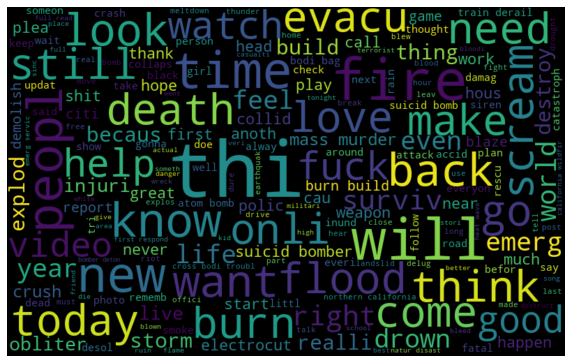

In [22]:
## Pour voir les mots communs dans nos tweets, nous pouvons créer un nuage de mots pour les voir réellement

all_words=' '.join([text for text in combi['tidy_sentence']])
from wordcloud import WordCloud

wordcloud=WordCloud(width=800,height=500,random_state=10,max_font_size=110).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#lst_word = all_words.split()
#print(len(lst_word))
#set_lst_word= set(lst_word)# supprimer les doublons dans les twitter
#print(len(set_lst_word))

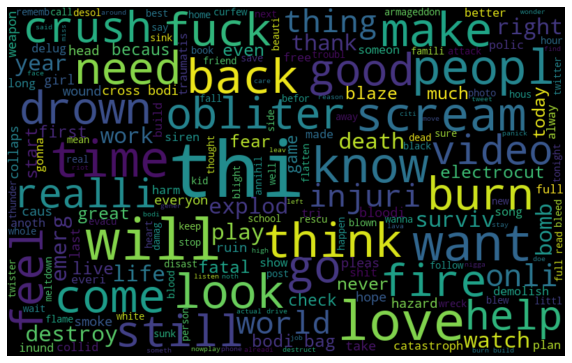

In [23]:
## Mots dans les tweets qui ne parlent pas de catostrophe naturelle

non_catastrophe=' '.join([text for text in combi['tidy_sentence'][combi['label']==0]])
wordcloud=WordCloud(width=800,height=500,random_state=10,max_font_size=110).generate(non_catastrophe)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

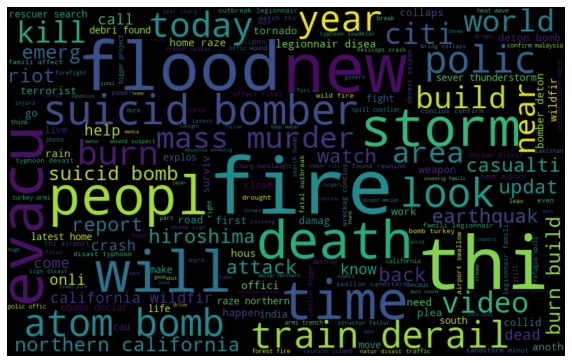

In [24]:
## Mots dans les tweets qui parlent de catostrophe naturelle

catastrophe=' '.join([text for text in combi['tidy_sentence'][combi['label']==1]])
wordcloud=WordCloud(width=800,height=500,random_state=10,max_font_size=110).generate(catastrophe)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

# Hashtags
#### Nous n'avons délibérément pas supprimé les hashtags car ils peuvent contenir  une tonne d'informations utiles. Nous allons extraire les hashtags et voir lesquels apparaissent le plus souvent

In [25]:
# cette fonction permet d'extraire les Hashtags 
def hashtag_extrai(x):
  hashtags = []
  for i in x:
    ht = re.findall(r"#(\w+)", i)
    hashtags.append(ht)

  return hashtags

   #pour extraire les hashtags des twittes non catastrophe
HT_non_catastrophe = hashtag_extrai(combi['tidy_sentence'][combi['label'] == 0])

  #pour extraire les hashtags des twittes  qui parle de catastrophe 
HT_catastrophe = hashtag_extrai(combi['tidy_sentence'][combi['label'] == 1])

HT_non_catastrophe = sum(HT_non_catastrophe, [])
HT_catastrophe= sum(HT_catastrophe, [])

##### Voyons maintenant les hashtags les plus courants

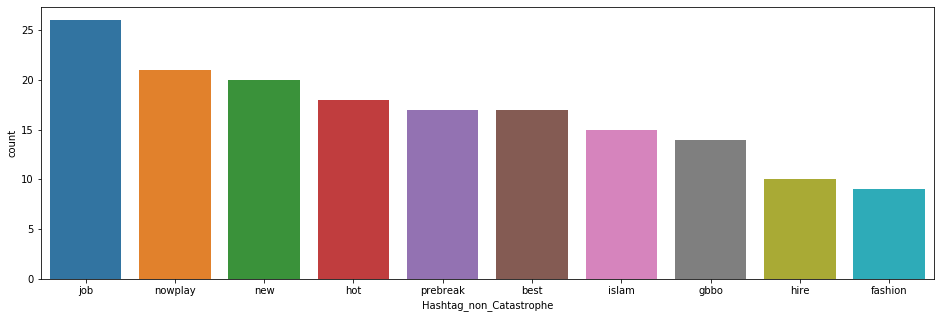

In [26]:
#Hashtag non catastrophe naturelle dans notre  données

a=nltk.FreqDist(HT_non_catastrophe)
d=pd.DataFrame({'Hashtag_non_Catastrophe':list(a.keys()),
                'count':list(a.values())})

d=d.nlargest(columns='count', n=10)
plt.figure(figsize=(16,5))
ax=sns.barplot(data=d, x='Hashtag_non_Catastrophe',y='count')
ax.set(ylabel='count')
plt.show()

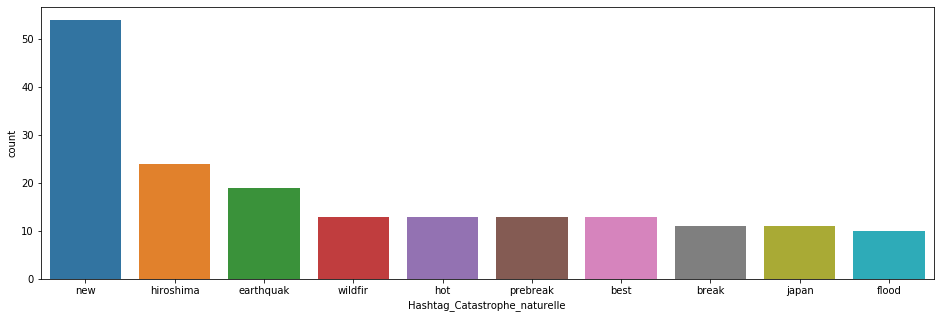

In [27]:
# hashtag catastrophe naturelle dans notre données

a=nltk.FreqDist(HT_catastrophe)
d=pd.DataFrame({'Hashtag_Catastrophe_naturelle':list(a.keys()),
                'count':list(a.values())})

d=d.nlargest(columns='count', n=10)
plt.figure(figsize=(16,5))
ax=sns.barplot(data=d, x='Hashtag_Catastrophe_naturelle',y='count')
ax.set(ylabel='count')
plt.show()

## VI. Extraction des Features

###### Avant de pouvoir réellement former notre modèle, nous devons transformer nos données textuelles dans un format que l'algorithme peut réellement lire. Il existe deux méthodes que nous pouvons utiliser, Bag-of-words et TF-IDF (terme fréquence – fréquence de document inverse). Nous nous allons  extraire avec un Bag of Words. Le script suivant utilise le modèle de sac de mots pour convertir des documents texte en fonctionnalités numériques correspondantes

### Nous définissons le max_features paramètre sur 1000, par ce que nous voulons utiliser  1000 mots les plus courants comme fonctionnalités pour former notre classificateur.

###  Nous définissons Le paramètre min_dfet  sur 5. Cela correspond au nombre minimum de twitte qui doivent contenir cette fonctionnalité. Nous n'incluons donc que les mots qui apparaissent dans au moins 5 twittes

### La max_dffonction, la valeur est définie sur 0,9; dans laquelle la fraction correspond à un pourcentage. Ici 0,9 signifie que nous devons inclure uniquement les mots qui apparaissent dans un maximum de 90% de tous les twitter.Par ce que Les mots qui apparaissent dans presque tous les twittes ne conviennent généralement pas à la classification car ils ne fournissent aucune information unique sur le twitte.

In [28]:
## Bag of Words pour le train

from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_features=1000, min_df=5, max_df=0.90, 
                                 stop_words=('english'))
bow = bow_vectorizer.fit_transform(combi['tidy_sentence']).toarray()

In [29]:
bow.max()

13

In [31]:
# connaitre la taille du train pour de diviser la combinaison qu'on vient d'affecter à la variable bow
train[train['label']==1]

,sentence,label
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...
7608,Two giant cranes holding a bridge collapse int...,1
7609,@aria_ahrary @TheTawniest The out of control w...,1
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,Police investigating after an e-bike collided ...,1


In [32]:
test

,sentence
0,Just happened a terrible car crash
1,"Heard about #earthquake is different cities, s..."
2,"there is a forest fire at spot pond, geese are..."
3,Apocalypse lighting. #Spokane #wildfires
4,Typhoon Soudelor kills 28 in China and Taiwan
...,...
3258,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,Storm in RI worse than last hurricane. My city...
3260,Green Line derailment in Chicago http://t.co/U...
3261,MEG issues Hazardous Weather Outlook (HWO) htt...


## VII. Construction du Modèle

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_bow = bow[:7613, :] # on enlève le train qui est maintenant le train_bow de la variable bow
test_bow = bow[7613:, :] # on enlève le test qui est maintenant le test_bow de la variable bow

In [34]:
len(train_bow)#en affichant la valeur train_bow on voit qu'on a les meme valeurs du train avant les pretraitement donc on a rien perdu

7613

In [35]:
len(test_bow)#en affichant la valeur test_bow on voit qu'on a les meme valeurs du test avant les pretraitement donc on a rien perdu

3263

In [37]:
X =train_bow
y =train['label']
lreg = LogisticRegression()
lreg.fit(X, y)
predictions2=lreg.predict(test_bow)

In [38]:
predictions2 #Nous avons de notre valeur predict

array([0, 1, 1, ..., 1, 1, 0])

In [39]:
results=pd.DataFrame(list(predictions2))# nous créons un DataFrame sur variable prediction

In [40]:
# Nous concatenons notre test et le DataFrame avec la colonne predict a fin de savoir quel twitte parle de catastrophe naturel ou non 
resultats = pd.concat([test, results], axis=1).rename(columns={0:"predict"})

In [41]:
# Nous exportons la prediction sur le format csv
export_csv = resultats.to_csv (r'prediction.csv', index = None, header=True)

In [46]:
#voyons le resultat des 40 prémiers lignes de notre prediction
resultats.head(40)

,sentence,predict
0,Just happened a terrible car crash,0
1,"Heard about #earthquake is different cities, s...",1
2,"there is a forest fire at spot pond, geese are...",1
3,Apocalypse lighting. #Spokane #wildfires,1
4,Typhoon Soudelor kills 28 in China and Taiwan,1
5,We're shaking...It's an earthquake,1
6,They'd probably still show more life than Arse...,0
7,Hey! How are you?,0
8,What a nice hat?,0
9,Fuck off!,0


## Nous voyons que notre modèle donnes de bonne prediction, même si c'est pas à 100%. J'ai essayé avec les LSTM mais ça ne me donnait pas de bonne prediction, là j'ai compris par ce les données ne sont pas assez pour pourvoire utiliser les LSTM, c'est ce qui ma  amené à utiliser un modèl de logistic regression. 